In [1]:
import os, sys
import pandas as pd
import numpy as np
from functools import reduce

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Scripts import Data_Loader_Functions as dL
from Scripts import Results_Evaluation as rE
RESULTS = os.path.join(module_path, 'Results', 'Thesis')
DATA = os.path.join(module_path, 'Data', 'Augmented Data')

## Load relevant variables

In [54]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
pivot = dL.create_pivot(os.path.join(DATA, 'group_2'), 'Session', 'Person', 'Session')
subjects = dL.create_pain_df(os.path.join(DATA, 'group_2'))['Person'].unique()

In [4]:
results = {}

## Metric & Type

In [5]:
metric = 'accuracy'
view_by = 'person'

## Base

In [8]:
EXPERIMENT = os.path.join(RESULTS, 'Original', '123 - Seed 123')
results['Base'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Base']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,0.69,0.78,0.92,0.53,0.91,0.6,0.67,0.79,0.64,0.8,0.66,0.76,0.73,0.12,0.73,0.12
0-sessions-Baseline-federated-pre-training,0.66,0.67,0.9,0.74,0.89,0.59,0.6,0.79,0.61,0.72,0.89,0.74,0.74,0.13,0.73,0.11
0-sessions-Baseline-random,0.34,0.21,0.075,0.36,0.11,0.49,0.62,0.22,0.45,0.28,0.12,0.35,0.3,0.15,0.3,0.17
1-sessions-Centralized-no-pre-training,0.79,0.79,0.78,0.64,0.91,0.59,0.38,0.83,0.57,0.72,0.85,0.55,0.7,0.16,0.7,0.16
2-sessions-Centralized-pre-training,0.76,0.78,0.8,0.53,0.9,0.6,0.71,0.84,0.72,0.79,0.85,0.66,0.75,0.14,0.75,0.11
3-sessions-Federated-no-pre-training,0.71,0.79,0.9,0.64,0.9,0.56,0.44,0.71,0.62,0.44,0.81,0.49,0.68,0.14,0.67,0.16
4-sessions-Federated-central-pre-training,0.74,0.78,0.92,0.53,0.91,0.62,0.75,0.82,0.68,0.76,0.73,0.63,0.75,0.12,0.74,0.11
5-sessions-Federated-federated-pre-training,0.71,0.74,0.89,0.74,0.91,0.64,0.67,0.81,0.73,0.71,0.88,0.64,0.77,0.12,0.76,0.094
6-sessions-Federated-no-pre-training-personalization,0.71,0.79,0.92,0.64,0.9,0.57,0.38,0.78,0.6,0.72,0.88,0.65,0.72,0.16,0.71,0.16


In [75]:
df = pd.read_csv(os.path.join(module_path, "CDL.csv"))
df['label'] = np.minimum(df['True Label'], 1)
df['prediction'] = df['CDL'].round()

In [76]:
df['TP'] = (df['label'] == 1) & (df['prediction'] == 1)
df['TN'] = (df['label'] == 0) & (df['prediction'] == 0)
df['FP'] = (df['label'] == 0) & (df['prediction'] == 1)
df['FN'] = (df['label'] == 1) & (df['prediction'] == 0)

In [77]:
df_filter = df[(df['Seed'] == 123) & (df['Subject ID'] == 43) & (df['Session'] == 8)]
print("TP: ", df_filter['TP'].sum())
print("TN: ", df_filter['TN'].sum())
print("FP: ", df_filter['FP'].sum())
print("FN: ", df_filter['FN'].sum())

TP:  0
TN:  96
FP:  3
FN:  0


In [46]:
df_res = pd.read_csv(os.path.join(module_path, 'Results/Thesis/NEW/123 - Seed 123 - Sessions NEW/2020-01-26-010842_PAIN_0-sessions-centralized-pre-training_TEST.csv'))

In [55]:
df_res[['Session', 
        'subject_43_true_positives', 
        'subject_43_true_negatives',
       'subject_43_false_positives',
       'subject_43_false_negatives']]

,Session,subject_43_true_positives,subject_43_true_negatives,subject_43_false_positives,subject_43_false_negatives
0,1,0.00,644.00,0.00,0.00
1,2,0.00,651.00,1.00,0.00
2,3,0.00,456.00,20.00,0.00
3,4,13.00,440.00,0.00,215.00
4,5,0.00,397.00,3.00,0.00
5,6,0.00,477.00,19.00,0.00
6,7,0.00,279.00,57.00,0.00
7,8,0.00,374.00,22.00,0.00
8,9,nan,nan,nan,nan


In [19]:
EXPERIMENT = os.path.join(RESULTS, 'NEW', '132 - Seed 132 - Sessions NEW')
results['Base'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Base']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-centralized-pre-training,0.74,0.79,0.9,0.56,0.92,0.55,0.71,0.79,0.63,0.74,0.72,0.65,0.72,0.12,0.72,0.12
2-sessions-Centralized-pre-training,0.79,0.78,0.79,0.56,0.93,0.6,0.66,0.84,0.71,0.74,0.83,0.66,0.74,0.13,0.74,0.11
4-sessions-Federated-central-pre-training,0.7,0.78,0.91,0.56,0.93,0.61,0.7,0.83,0.69,0.68,0.78,0.61,0.75,0.11,0.73,0.12
7-sessions-Federated-central-pre-training-personalization,0.81,0.78,0.87,0.56,0.92,0.62,0.68,0.83,0.67,0.74,0.9,0.73,0.76,0.13,0.76,0.11
10-sessions-Federated-central-pre-training-local-models,0.81,0.78,0.87,0.56,0.92,0.61,0.62,0.83,0.66,0.74,0.9,0.71,0.75,0.14,0.75,0.12


In [10]:
EXPERIMENT = os.path.join(RESULTS, '1 - CNN - Base')
results['Base'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Base']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,66.0%,78.9%,92.3%,54.7%,67.3%,48.4%,63.3%,77.9%,59.9%,75.7%,80.4%,68.5%,68.7%,15.8%,69.5%,12.2%
0-sessions-Baseline-federated-pre-training,66.3%,79.6%,90.9%,68.4%,66.3%,49.0%,59.2%,85.2%,62.2%,71.9%,83.3%,58.5%,69.6%,15.6%,70.1%,12.5%
1-sessions-Centralized-no-pre-training,69.2%,79.1%,88.0%,63.9%,89.1%,58.3%,37.9%,86.5%,61.1%,72.3%,91.0%,73.9%,72.7%,14.8%,72.5%,15.7%
2-sessions-Centralized-pre-training,76.0%,78.8%,87.3%,54.7%,67.5%,63.2%,50.5%,83.5%,70.8%,76.3%,88.4%,68.3%,72.7%,15.4%,72.1%,12.0%
3-sessions-Federated-no-pre-training,74.3%,79.1%,88.2%,63.9%,91.0%,54.2%,37.9%,83.7%,55.6%,38.4%,76.7%,47.8%,67.1%,14.2%,65.9%,18.9%
4-sessions-Federated-central-pre-training,77.7%,78.9%,88.4%,54.7%,68.5%,60.3%,66.3%,83.3%,59.1%,70.6%,83.4%,64.4%,71.3%,16.4%,71.3%,10.9%
5-sessions-Federated-federated-pre-training,76.9%,79.4%,85.4%,68.4%,70.5%,56.0%,50.8%,87.4%,59.2%,65.4%,82.8%,63.0%,69.7%,15.9%,70.4%,12.0%


## Exclude Pain Level "0" from training

In [7]:
EXPERIMENT = os.path.join(RESULTS, '2 - CNN - Pain Gap')
results['Pain Level 0'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Pain Level 0']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,70.7%,77.2%,90.7%,56.7%,52.6%,48.4%,68.6%,81.0%,63.2%,84.8%,58.7%,64.6%,66.9%,13.0%,68.1%,13.2%
0-sessions-Baseline-federated-pre-training,65.9%,79.7%,91.4%,67.9%,72.2%,53.5%,42.5%,80.3%,56.3%,71.9%,88.7%,78.0%,69.6%,13.9%,70.7%,14.5%
1-sessions-Centralized-no-pre-training,67.5%,79.3%,91.9%,63.9%,88.1%,54.5%,37.9%,81.5%,58.2%,72.0%,90.6%,63.1%,71.3%,14.9%,70.7%,16.4%
2-sessions-Centralized-pre-training,69.2%,77.4%,91.2%,56.7%,62.0%,59.2%,60.0%,85.6%,65.4%,84.8%,91.3%,67.8%,72.9%,16.3%,72.5%,12.9%
3-sessions-Federated-no-pre-training,79.9%,79.1%,82.2%,63.9%,90.5%,56.7%,53.9%,81.9%,55.5%,71.9%,76.9%,44.4%,70.2%,16.7%,69.7%,14.4%
4-sessions-Federated-central-pre-training,73.4%,77.5%,88.2%,56.7%,62.0%,62.2%,76.6%,84.6%,57.3%,85.6%,78.1%,61.3%,72.1%,16.9%,71.9%,11.5%
5-sessions-Federated-federated-pre-training,77.7%,79.7%,75.7%,67.9%,74.9%,58.7%,45.8%,86.4%,55.7%,71.9%,78.8%,49.6%,68.4%,16.7%,68.6%,13.0%


## Use RMSProp as an optimizer instead of SGD

In [8]:
EXPERIMENT = os.path.join(RESULTS, '3 - CNN - RMS Prop')
results['RMSProp'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['RMSProp']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,68.1%,74.6%,69.7%,66.0%,80.9%,55.3%,59.0%,81.6%,62.4%,74.6%,92.1%,73.7%,69.9%,15.0%,71.5%,10.4%
0-sessions-Baseline-federated-pre-training,67.8%,73.8%,91.7%,65.8%,88.7%,61.4%,60.1%,79.1%,54.9%,71.9%,88.5%,67.6%,73.3%,15.9%,72.6%,12.1%
1-sessions-Centralized-no-pre-training,82.0%,79.2%,87.3%,63.9%,88.5%,59.3%,39.1%,77.0%,68.2%,72.8%,91.1%,71.5%,73.0%,15.5%,73.3%,14.6%
2-sessions-Centralized-pre-training,82.8%,74.5%,74.4%,66.0%,78.9%,61.4%,56.1%,81.9%,70.1%,75.2%,89.3%,74.8%,72.4%,15.3%,73.8%,9.3%
3-sessions-Federated-no-pre-training,66.5%,79.2%,91.9%,63.9%,90.9%,51.4%,37.1%,72.2%,60.1%,45.1%,66.4%,43.5%,65.9%,15.7%,64.0%,17.8%
4-sessions-Federated-central-pre-training,80.7%,74.6%,88.4%,66.0%,81.7%,65.9%,51.2%,84.5%,61.5%,74.6%,89.3%,77.4%,74.4%,15.1%,74.7%,11.5%
5-sessions-Federated-federated-pre-training,72.8%,73.6%,90.9%,65.8%,90.5%,56.3%,58.8%,82.7%,56.0%,72.0%,76.6%,54.3%,71.7%,16.1%,70.9%,13.0%


## ResNet Base

In [9]:
EXPERIMENT = os.path.join(RESULTS, '4 - ResNet - Base')
results['ResNet'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['ResNet']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
1-sessions-Centralized-no-pre-training,65.9%,54.6%,92.5%,36.1%,57.0%,52.8%,64.3%,77.7%,54.8%,69.5%,88.0%,65.2%,66.1%,20.7%,64.9%,15.7%
2-sessions-Centralized-pre-training,65.9%,50.1%,92.5%,63.9%,89.0%,58.3%,37.9%,77.7%,54.8%,37.8%,88.0%,65.2%,67.3%,14.5%,65.1%,18.7%
3-sessions-Federated-no-pre-training,37.4%,20.7%,13.7%,36.1%,52.2%,52.7%,62.2%,31.3%,55.2%,28.1%,74.9%,65.2%,43.7%,20.1%,44.2%,19.0%
4-sessions-Federated-central-pre-training,34.3%,79.3%,7.5%,63.9%,76.6%,40.7%,35.7%,22.4%,56.0%,71.9%,63.3%,65.2%,46.8%,19.2%,51.4%,22.9%


## CNN - No Max Pooling After Last Conv2D Layer

In [10]:
EXPERIMENT = os.path.join(RESULTS, '5 - CNN - No MaxPool after Conv2D')
results['No Global Max Pooling'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['No Global Max Pooling']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,65.6%,78.8%,92.5%,46.9%,50.8%,45.6%,67.5%,78.2%,59.4%,81.9%,62.9%,75.6%,65.5%,13.8%,67.1%,14.8%
0-sessions-Baseline-federated-pre-training,65.9%,79.2%,92.1%,69.0%,57.7%,52.1%,65.5%,84.9%,62.1%,72.1%,80.6%,52.0%,69.6%,12.9%,69.4%,12.8%
1-sessions-Centralized-no-pre-training,79.5%,65.3%,85.0%,58.0%,82.2%,61.5%,49.2%,83.8%,63.4%,72.1%,90.8%,68.1%,72.1%,15.1%,71.6%,12.7%
2-sessions-Centralized-pre-training,73.7%,79.2%,82.2%,46.9%,59.4%,60.4%,67.7%,84.8%,63.7%,81.9%,88.9%,72.0%,71.3%,15.9%,71.7%,12.5%
3-sessions-Federated-no-pre-training,74.6%,65.4%,84.0%,58.0%,77.3%,54.8%,50.7%,81.4%,56.7%,70.5%,74.9%,50.0%,67.4%,14.6%,66.5%,12.2%
4-sessions-Federated-central-pre-training,73.4%,79.0%,89.7%,46.9%,59.1%,60.3%,64.4%,85.1%,59.9%,72.8%,82.2%,74.3%,70.4%,15.8%,70.6%,12.6%
5-sessions-Federated-federated-pre-training,78.4%,79.0%,86.4%,69.0%,62.0%,57.9%,57.2%,85.4%,60.4%,72.6%,81.1%,72.4%,70.3%,15.5%,71.8%,10.5%


## Convolution + Activation ReLU

In [11]:
EXPERIMENT = os.path.join(RESULTS, '6 - Activation')
results['ReLU'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['ReLU']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,66.3%,79.1%,90.5%,57.7%,63.7%,48.3%,68.5%,80.5%,61.1%,81.6%,74.9%,66.5%,68.9%,13.4%,69.9%,11.8%
0-sessions-Baseline-federated-pre-training,65.9%,79.5%,92.3%,65.6%,60.6%,50.9%,63.1%,82.4%,64.5%,71.9%,80.8%,68.7%,69.7%,14.1%,70.5%,11.4%
1-sessions-Centralized-no-pre-training,72.8%,74.0%,79.8%,63.9%,89.2%,62.2%,38.3%,85.2%,66.2%,71.7%,89.8%,70.7%,72.4%,14.9%,72.0%,14.1%
2-sessions-Centralized-pre-training,79.6%,79.3%,80.0%,57.7%,64.3%,66.2%,66.3%,82.1%,67.1%,82.2%,90.5%,65.9%,73.3%,15.6%,73.4%,10.0%
3-sessions-Federated-no-pre-training,65.9%,79.0%,82.9%,63.9%,85.8%,57.5%,45.4%,83.4%,60.3%,57.3%,77.8%,54.6%,69.0%,14.1%,67.8%,13.4%
4-sessions-Federated-central-pre-training,68.3%,79.1%,83.4%,57.7%,67.2%,62.3%,78.8%,82.7%,61.6%,82.4%,86.7%,60.0%,72.9%,15.3%,72.5%,10.6%
5-sessions-Federated-federated-pre-training,66.2%,79.4%,85.2%,65.6%,62.5%,57.5%,60.5%,84.5%,64.5%,71.5%,80.5%,68.5%,70.2%,15.7%,70.5%,9.6%


## Convolution + Batch Norm

In [12]:
EXPERIMENT = os.path.join(RESULTS, '7 - Batch Norm')
results['Batch Norm'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Batch Norm']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,68.6%,79.1%,91.6%,42.5%,67.2%,50.9%,62.2%,79.7%,61.4%,80.4%,77.3%,70.7%,69.0%,13.5%,69.3%,13.7%
0-sessions-Baseline-federated-pre-training,66.8%,79.2%,92.3%,70.7%,74.5%,56.5%,59.3%,78.2%,57.8%,71.9%,89.9%,73.9%,71.8%,14.4%,72.6%,11.5%
1-sessions-Centralized-no-pre-training,79.3%,79.1%,81.6%,63.9%,89.2%,60.0%,49.0%,82.8%,56.3%,72.0%,89.5%,64.6%,71.9%,16.5%,72.3%,13.3%
2-sessions-Centralized-pre-training,81.3%,79.0%,79.1%,42.5%,67.1%,63.5%,63.4%,84.8%,69.2%,80.5%,85.8%,66.9%,72.1%,14.9%,71.9%,12.4%
3-sessions-Federated-no-pre-training,76.0%,79.1%,83.8%,63.9%,88.7%,53.2%,49.3%,73.3%,55.5%,51.7%,66.4%,40.2%,65.9%,15.5%,65.1%,15.3%
4-sessions-Federated-central-pre-training,79.9%,79.0%,86.9%,42.5%,71.4%,63.0%,56.6%,83.9%,59.6%,80.5%,78.9%,65.9%,71.3%,15.3%,70.7%,13.3%
5-sessions-Federated-federated-pre-training,81.0%,79.1%,83.6%,70.7%,78.8%,62.0%,64.1%,81.0%,58.6%,72.1%,76.8%,50.2%,71.7%,16.3%,71.5%,10.6%


## Convolution + Batch Norm + ReLU

In [13]:
EXPERIMENT = os.path.join(RESULTS, '8 - Activation and Batch Norm')
results['ReLU + Batch Norm'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['ReLU + Batch Norm']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,71.7%,77.7%,91.1%,55.5%,91.0%,56.5%,65.4%,78.4%,65.2%,75.9%,63.9%,70.0%,72.1%,13.4%,71.9%,11.6%
0-sessions-Baseline-federated-pre-training,66.9%,75.5%,83.0%,67.7%,89.2%,51.7%,60.9%,80.2%,70.4%,75.2%,90.7%,70.6%,72.8%,10.5%,73.5%,11.3%
1-sessions-Centralized-no-pre-training,69.0%,79.0%,78.7%,63.9%,89.9%,56.0%,38.6%,83.1%,58.9%,71.8%,88.1%,63.1%,70.0%,15.0%,70.0%,14.9%
2-sessions-Centralized-pre-training,68.9%,77.4%,73.6%,55.5%,92.6%,61.4%,72.3%,84.5%,68.7%,75.9%,85.9%,68.7%,74.0%,14.1%,73.8%,10.4%
3-sessions-Federated-no-pre-training,68.4%,79.0%,76.8%,63.9%,89.0%,53.6%,42.7%,68.3%,60.9%,49.7%,82.0%,58.0%,66.0%,14.1%,66.0%,14.0%
4-sessions-Federated-central-pre-training,69.6%,77.5%,89.7%,55.5%,91.7%,60.5%,64.7%,86.0%,70.4%,74.7%,69.5%,70.4%,74.3%,12.5%,73.3%,11.2%
5-sessions-Federated-federated-pre-training,67.4%,77.7%,85.8%,67.7%,90.5%,59.4%,60.6%,79.5%,77.0%,65.2%,84.8%,67.6%,74.3%,11.3%,73.6%,10.3%


## Convolution + Batch Norm + ReLU

In [14]:
EXPERIMENT = os.path.join(RESULTS, '9 - Activation, Batch Norm, No Global MaxPool')
results['ReLU + Batch Norm + No Glob Max Pool'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['ReLU + Batch Norm + No Glob Max Pool']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,72.2%,77.8%,90.5%,64.7%,90.9%,56.9%,66.9%,78.1%,63.0%,74.7%,70.1%,76.1%,72.8%,12.2%,73.5%,10.3%
0-sessions-Baseline-federated-pre-training,66.2%,69.0%,86.8%,70.6%,89.2%,52.8%,57.7%,78.7%,66.0%,73.5%,91.2%,74.4%,72.5%,10.9%,73.0%,12.0%
1-sessions-Centralized-no-pre-training,69.6%,61.8%,82.1%,60.7%,87.4%,59.6%,46.8%,80.2%,58.3%,71.9%,87.7%,68.3%,70.2%,15.0%,69.5%,12.8%
2-sessions-Centralized-pre-training,75.3%,77.8%,77.4%,64.7%,90.5%,62.0%,69.5%,82.5%,55.4%,74.4%,87.2%,68.0%,73.0%,12.8%,73.7%,10.3%
3-sessions-Federated-no-pre-training,69.6%,61.7%,86.0%,60.7%,87.5%,54.8%,55.0%,68.0%,61.8%,39.8%,83.2%,63.0%,66.8%,13.7%,65.9%,14.1%
4-sessions-Federated-central-pre-training,74.1%,77.8%,89.5%,64.7%,91.7%,58.3%,66.7%,84.4%,68.8%,73.7%,75.0%,70.7%,74.6%,11.2%,74.6%,10.0%
5-sessions-Federated-federated-pre-training,68.6%,76.6%,89.3%,70.6%,89.9%,59.3%,59.9%,78.3%,68.6%,52.9%,87.9%,70.2%,73.1%,10.4%,72.7%,12.2%


## Convolution + Batch Norm + ReLU

In [15]:
EXPERIMENT = os.path.join(RESULTS, '10 - Replace Stride with Pooling')
results['Replace Stride with Pooling'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Replace Stride with Pooling']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,66.3%,77.7%,91.9%,64.5%,76.2%,53.7%,60.6%,79.0%,60.4%,73.2%,89.4%,70.7%,71.5%,15.9%,72.0%,11.6%
0-sessions-Baseline-federated-pre-training,69.3%,78.8%,86.0%,62.9%,77.1%,47.3%,58.4%,82.9%,60.7%,71.9%,85.2%,51.1%,69.1%,14.9%,69.3%,13.2%
1-sessions-Centralized-no-pre-training,71.1%,79.2%,81.4%,62.3%,90.6%,57.9%,38.2%,82.4%,61.4%,72.6%,91.2%,68.9%,71.4%,15.0%,71.4%,15.1%
2-sessions-Centralized-pre-training,77.5%,77.7%,84.6%,64.5%,76.0%,65.9%,60.3%,84.4%,75.6%,74.0%,87.2%,69.1%,75.2%,16.3%,74.7%,8.5%
3-sessions-Federated-no-pre-training,71.4%,79.3%,86.2%,62.3%,92.1%,54.1%,45.9%,82.5%,56.7%,60.0%,72.6%,36.5%,68.5%,14.9%,66.6%,16.9%
4-sessions-Federated-central-pre-training,77.4%,77.7%,81.0%,64.5%,78.1%,62.8%,61.6%,81.9%,59.9%,73.4%,78.0%,55.9%,71.3%,17.1%,71.0%,9.3%
5-sessions-Federated-federated-pre-training,80.1%,78.8%,82.6%,62.9%,78.1%,56.1%,44.2%,84.9%,57.7%,53.3%,71.6%,39.1%,66.8%,15.2%,65.8%,15.7%


## All Modifications

In [16]:
EXPERIMENT = os.path.join(RESULTS, '11 - All Modifications')
results['All Modifications'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['All Modifications']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,67.1%,76.5%,87.0%,53.1%,90.4%,59.6%,69.6%,79.7%,61.6%,81.9%,76.0%,81.7%,73.5%,11.8%,73.7%,11.5%
0-sessions-Baseline-federated-pre-training,66.6%,22.2%,92.6%,60.9%,89.6%,62.4%,63.5%,77.8%,65.4%,71.9%,87.7%,75.7%,72.4%,14.0%,69.7%,18.6%
1-sessions-Centralized-no-pre-training,67.1%,70.9%,85.8%,69.0%,75.7%,58.2%,49.1%,82.4%,64.2%,71.3%,87.1%,44.3%,70.6%,15.3%,68.7%,13.5%
2-sessions-Centralized-pre-training,76.5%,75.6%,88.9%,53.1%,92.9%,59.5%,69.7%,78.3%,72.4%,81.6%,89.6%,75.4%,76.2%,11.5%,76.1%,11.8%
3-sessions-Federated-no-pre-training,68.4%,76.2%,92.3%,69.0%,78.5%,54.6%,40.9%,76.5%,62.3%,67.4%,46.1%,37.4%,66.2%,16.2%,64.1%,16.6%
4-sessions-Federated-central-pre-training,66.9%,76.1%,91.3%,53.1%,92.4%,60.6%,75.9%,80.3%,59.0%,80.0%,79.1%,78.9%,74.7%,12.1%,74.5%,12.3%
5-sessions-Federated-federated-pre-training,74.1%,54.9%,92.0%,60.9%,91.4%,63.8%,73.8%,79.0%,65.3%,72.1%,87.2%,75.9%,75.2%,15.6%,74.2%,11.9%


## Personalization

In [17]:
EXPERIMENT = os.path.join(RESULTS, '12 - Personalization, Same Padding, Max Pool, Activation, Batch Norm')
results['Same Padding'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Same Padding']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,67.5%,78.2%,92.0%,67.3%,89.2%,60.6%,71.2%,79.2%,66.2%,75.0%,70.2%,73.9%,74.4%,12.8%,74.2%,9.3%
0-sessions-Baseline-federated-pre-training,66.0%,73.9%,89.3%,71.9%,89.3%,58.2%,61.1%,79.1%,59.7%,71.9%,90.7%,73.7%,73.5%,12.1%,73.7%,11.5%
1-sessions-Centralized-no-pre-training,72.9%,75.7%,83.0%,69.0%,75.8%,54.5%,43.1%,83.6%,57.7%,71.8%,88.4%,65.2%,69.3%,16.2%,70.1%,13.2%
2-sessions-Centralized-pre-training,76.3%,78.0%,73.7%,67.3%,90.9%,63.5%,72.1%,85.4%,68.9%,75.2%,88.6%,55.6%,74.9%,13.4%,74.6%,10.3%
3-sessions-Federated-no-pre-training,72.5%,76.2%,87.6%,69.0%,74.1%,53.4%,54.1%,69.2%,57.6%,60.0%,79.3%,47.0%,67.0%,15.6%,66.6%,12.2%
4-sessions-Federated-central-pre-training,68.7%,78.0%,90.3%,67.3%,91.1%,63.2%,68.9%,83.6%,70.7%,75.1%,78.3%,62.4%,76.1%,11.3%,74.8%,9.7%
5-sessions-Federated-federated-pre-training,66.8%,74.4%,89.8%,71.9%,89.8%,62.0%,70.5%,78.9%,74.1%,71.5%,85.5%,58.9%,76.0%,12.1%,74.5%,10.0%
7-sessions-Federated-central-pre-training-personalization,71.6%,78.0%,84.5%,67.3%,91.9%,64.1%,79.9%,82.4%,70.2%,75.3%,90.7%,74.6%,77.5%,12.6%,77.5%,8.8%
9-sessions-Federated-no-pre-training-local-models,67.7%,76.0%,92.0%,69.0%,75.5%,56.0%,42.5%,67.4%,62.1%,71.9%,88.0%,65.2%,69.6%,16.3%,69.4%,13.2%


## Joint Results - All Experiments

In [18]:
result_df = pd.DataFrame()
for key, df in results.items():
    result_df[key] = df['Weighted Mean']
result_df

,Base,Pain Level 0,RMSProp,ResNet,No Global Max Pooling,ReLU,Batch Norm,ReLU + Batch Norm,ReLU + Batch Norm + No Glob Max Pool,Replace Stride with Pooling,All Modifications,Same Padding
Experiment,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,68.7%,66.9%,69.9%,nan%,65.5%,68.9%,69.0%,72.1%,72.8%,71.5%,73.5%,74.4%
0-sessions-Baseline-federated-pre-training,69.6%,69.6%,73.3%,nan%,69.6%,69.7%,71.8%,72.8%,72.5%,69.1%,72.4%,73.5%
1-sessions-Centralized-no-pre-training,72.7%,71.3%,73.0%,66.1%,72.1%,72.4%,71.9%,70.0%,70.2%,71.4%,70.6%,69.3%
2-sessions-Centralized-pre-training,72.7%,72.9%,72.4%,67.3%,71.3%,73.3%,72.1%,74.0%,73.0%,75.2%,76.2%,74.9%
3-sessions-Federated-no-pre-training,67.1%,70.2%,65.9%,43.7%,67.4%,69.0%,65.9%,66.0%,66.8%,68.5%,66.2%,67.0%
4-sessions-Federated-central-pre-training,71.3%,72.1%,74.4%,46.8%,70.4%,72.9%,71.3%,74.3%,74.6%,71.3%,74.7%,76.1%
5-sessions-Federated-federated-pre-training,69.7%,68.4%,71.7%,nan%,70.3%,70.2%,71.7%,74.3%,73.1%,66.8%,75.2%,76.0%


# SEEDS

## Seed 123

In [20]:
EXPERIMENT = os.path.join(RESULTS, '123 - Seed 123')
results['Seed 123'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Seed 123']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,69.3%,78.1%,92.4%,53.3%,91.0%,59.6%,66.9%,78.6%,64.5%,79.6%,66.4%,76.1%,73.4%,12.2%,73.0%,11.9%
0-sessions-Baseline-federated-pre-training,66.0%,66.5%,90.0%,73.8%,89.1%,59.3%,60.4%,79.4%,61.0%,72.3%,89.4%,73.7%,73.6%,12.7%,73.4%,11.4%
0-sessions-Baseline-random,34.1%,20.7%,7.5%,36.1%,11.0%,48.9%,62.1%,22.3%,45.2%,28.1%,12.0%,34.8%,30.2%,15.3%,30.2%,16.6%
1-sessions-Centralized-no-pre-training,79.2%,79.0%,77.6%,63.9%,91.2%,59.2%,37.8%,82.8%,57.2%,72.1%,85.2%,54.6%,70.2%,15.9%,70.0%,15.6%
2-sessions-Centralized-pre-training,76.5%,78.1%,79.6%,53.3%,90.1%,60.5%,71.2%,84.2%,72.2%,79.4%,85.3%,65.6%,74.9%,13.6%,74.7%,10.7%
3-sessions-Federated-no-pre-training,71.0%,79.0%,89.7%,63.9%,90.2%,56.3%,43.6%,71.1%,61.8%,44.1%,81.3%,48.7%,68.3%,14.1%,66.7%,16.5%
4-sessions-Federated-central-pre-training,74.1%,77.9%,92.2%,53.3%,90.9%,62.3%,75.3%,82.4%,67.8%,76.4%,72.6%,63.1%,75.3%,12.2%,74.0%,11.4%
5-sessions-Federated-federated-pre-training,71.1%,74.4%,88.9%,73.8%,90.7%,64.4%,67.4%,81.4%,72.9%,71.4%,87.9%,63.7%,76.8%,12.3%,75.7%,9.4%
6-sessions-Federated-no-pre-training-personalization,70.7%,79.0%,92.1%,63.9%,90.0%,57.0%,37.8%,77.9%,60.4%,71.7%,88.0%,65.2%,71.8%,15.8%,71.1%,15.7%


## Seed 124

In [21]:
EXPERIMENT = os.path.join(RESULTS, '124 - Seed 124')
results['Seed 124'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Seed 124']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,70.5%,78.1%,91.7%,46.2%,90.5%,60.5%,67.1%,79.3%,64.5%,76.9%,67.4%,76.7%,73.1%,12.5%,72.5%,12.7%
0-sessions-Baseline-federated-pre-training,66.8%,69.9%,86.2%,65.8%,90.4%,60.2%,63.0%,81.8%,68.7%,76.7%,88.9%,75.0%,74.8%,11.3%,74.4%,10.4%
0-sessions-Baseline-random,34.1%,20.7%,7.5%,36.1%,11.0%,48.9%,62.1%,22.3%,45.2%,28.1%,12.0%,34.8%,30.2%,15.3%,30.2%,16.6%
1-sessions-Centralized-no-pre-training,75.0%,61.9%,78.1%,54.1%,80.1%,60.6%,48.8%,81.4%,60.5%,71.8%,82.9%,67.6%,69.0%,15.8%,68.5%,11.4%
2-sessions-Centralized-pre-training,81.0%,77.7%,76.4%,46.2%,93.2%,62.7%,68.8%,84.3%,70.4%,78.2%,89.7%,75.9%,75.1%,13.4%,75.4%,12.5%
3-sessions-Federated-no-pre-training,74.3%,61.7%,86.7%,54.1%,79.8%,59.6%,51.6%,63.9%,63.7%,38.3%,75.3%,43.7%,65.3%,14.7%,62.7%,14.5%
4-sessions-Federated-central-pre-training,71.9%,77.9%,90.6%,46.2%,91.6%,62.5%,63.8%,83.6%,70.8%,73.4%,71.1%,70.0%,74.3%,11.8%,72.8%,12.5%
5-sessions-Federated-federated-pre-training,71.6%,72.4%,90.2%,65.8%,91.8%,63.7%,62.6%,78.3%,74.6%,69.2%,82.7%,68.0%,75.5%,11.6%,74.2%,9.7%
6-sessions-Federated-no-pre-training-personalization,73.8%,61.9%,92.3%,54.1%,78.8%,60.6%,49.4%,71.4%,60.7%,71.6%,87.2%,64.8%,70.3%,15.8%,68.9%,12.9%


## Seed 125

In [23]:
EXPERIMENT = os.path.join(RESULTS, '125 - Seed 125')
results['Seed 125'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['Seed 125']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-Baseline-central-pre-training,67.8%,79.3%,92.3%,48.2%,90.5%,55.3%,67.0%,78.3%,64.6%,74.6%,67.0%,73.5%,71.9%,12.1%,71.5%,12.9%
0-sessions-Baseline-federated-pre-training,66.2%,78.5%,79.2%,71.9%,90.3%,54.1%,60.8%,79.9%,66.1%,73.8%,88.3%,71.5%,72.4%,11.8%,73.4%,10.7%
0-sessions-Baseline-random,34.1%,20.9%,7.7%,36.1%,11.7%,48.4%,62.1%,23.2%,45.2%,28.1%,12.0%,35.4%,30.3%,15.2%,30.4%,16.4%
1-sessions-Centralized-no-pre-training,65.9%,79.1%,82.7%,56.9%,83.8%,50.7%,44.2%,85.6%,55.2%,69.2%,89.3%,65.2%,68.7%,14.9%,69.0%,15.1%
2-sessions-Centralized-pre-training,79.8%,79.1%,80.4%,48.2%,91.8%,63.7%,72.2%,84.0%,69.5%,76.6%,89.5%,63.3%,75.6%,13.6%,74.8%,12.3%
3-sessions-Federated-no-pre-training,69.3%,79.1%,83.6%,56.9%,83.1%,54.9%,54.9%,69.9%,64.1%,50.2%,82.4%,58.7%,67.8%,13.0%,67.3%,12.4%
4-sessions-Federated-central-pre-training,69.6%,79.1%,90.5%,48.2%,91.2%,58.9%,71.5%,85.7%,71.5%,62.2%,75.0%,72.0%,74.0%,10.9%,73.0%,12.8%
5-sessions-Federated-federated-pre-training,71.3%,79.4%,86.1%,71.9%,91.9%,61.6%,72.8%,78.2%,72.0%,72.4%,82.1%,57.6%,75.6%,12.0%,74.8%,9.6%
6-sessions-Federated-no-pre-training-personalization,66.8%,79.1%,92.4%,56.9%,83.5%,57.2%,44.8%,77.0%,60.1%,68.9%,87.7%,65.4%,70.9%,15.5%,70.0%,14.3%


## Seed 131

In [32]:
EXPERIMENT = os.path.join(RESULTS, '123 - Sd 123 - Unbalanced')
results['123 - Sd 123 - Unbalanced'] = rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)
results['123 - Sd 123 - Unbalanced']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-unbalanced-Baseline-central-pre-training,0.7,0.8,0.9,0.4,0.9,0.6,0.7,0.8,0.7,0.8,0.7,0.8,0.7,0.1,0.7,0.1
0-unbalanced-Baseline-federated-pre-training,0.7,0.7,0.9,0.7,0.9,0.6,0.6,0.8,0.6,0.7,0.9,0.7,0.7,0.1,0.7,0.1
1-unbalanced-Centralized-no-pre-training,nan,0.9,nan,0.9,1.0,0.8,0.8,nan,nan,0.9,nan,nan,0.9,0.0,0.9,0.1
2-unbalanced-Centralized-pre-training,nan,0.9,nan,0.9,0.9,0.8,0.9,nan,nan,1.0,nan,nan,0.9,0.0,0.9,0.0
3-unbalanced-Federated-no-pre-training,nan,0.9,nan,0.3,0.9,0.8,0.8,nan,nan,1.0,nan,nan,0.8,0.0,0.8,0.2
4-unbalanced-Federated-central-pre-training,nan,0.9,nan,0.2,0.9,0.8,0.8,nan,nan,1.0,nan,nan,0.8,0.0,0.8,0.3
5-unbalanced-Federated-federated-pre-training,nan,0.9,nan,0.3,0.9,0.8,0.8,nan,nan,0.9,nan,nan,0.8,0.0,0.8,0.2
6-unbalanced-Federated-no-pre-training-personalization,nan,0.9,nan,0.9,0.9,0.8,0.9,nan,nan,0.9,nan,nan,0.9,0.0,0.9,0.0
7-unbalanced-Federated-central-pre-training-personalization,nan,0.9,nan,0.9,0.9,0.8,0.9,nan,nan,1.0,nan,nan,0.9,0.0,0.9,0.0


# Seed 123

In [10]:
EXPERIMENT = os.path.join(RESULTS, '123 - Sd 123 - Sessions NEW')
results['Seed 123'] = rE.results_table(EXPERIMENT, 'accuracy', view_by, subjects, pivot)
results['Seed 123']

,43,48,52,59,64,80,92,96,107,109,115,120,Weighted Mean,Weighted SD,Mean,SD
Experiment,,,,,,,,,,,,,,,,
0-sessions-centralized-pre-training,67.8%,78.9%,92.4%,49.0%,90.5%,59.2%,69.5%,78.5%,65.2%,79.0%,74.7%,71.9%,73.9%,11.9%,73.0%,12.3%
2-sessions-Centralized-pre-training,78.1%,78.9%,86.5%,49.0%,92.1%,63.1%,64.8%,84.4%,67.5%,78.7%,89.3%,72.0%,75.9%,12.9%,75.4%,12.6%
4-sessions-Federated-central-pre-training,69.5%,79.0%,91.9%,49.0%,91.3%,62.4%,69.7%,83.5%,72.8%,78.8%,78.6%,63.1%,76.1%,12.1%,74.1%,12.4%
7-sessions-Federated-central-pre-training-personalization,77.7%,78.7%,88.9%,49.0%,92.9%,63.8%,74.3%,85.4%,71.5%,78.8%,90.4%,72.4%,77.7%,12.0%,77.0%,12.3%
10-sessions-Federated-central-pre-training-local-models,79.9%,78.7%,89.1%,49.0%,92.3%,63.2%,61.3%,84.4%,69.4%,78.7%,90.2%,73.0%,76.4%,13.0%,75.8%,13.1%


In [13]:
df = pd.read_csv(os.path.join(module_path, 'BCDL.csv'))
df['True Label'] = np.minimum(df['True Label'], 1)
df['BCDL_pred'] = (df['BCDL'] >= 0.5).astype(int)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['True Label'], df['BCDL_pred'])

array([[139069,  25551],
       [ 14463,  16367]])

In [17]:
df_1 = pd.read_csv(os.path.join(module_path, 'Results/Thesis/123 - Seed 123/2019-08-30-144543_PAIN_0-sessions-Baseline-central-pre-training_TEST.csv'))
df_2 = pd.read_csv(os.path.join(module_path, 'Results/Thesis/123 - Sd 123 - Sessions NEW/2020-01-26-010842_PAIN_0-sessions-centralized-pre-training_TEST.csv'))

In [32]:
df_1

,Unnamed: 0,Session,accuracy,auc,false_negatives,false_positives,loss,pr,precision,recall,...,subject_96_false_negatives,subject_96_false_positives,subject_96_loss,subject_96_pr,subject_96_precision,subject_96_recall,subject_96_true_negatives,subject_96_true_positives,true_negatives,true_positives
0,0,1,0.81,0.87,734.00,"1,413.00",0.47,0.66,0.57,0.72,...,0.00,65.00,0.16,0.00,0.00,0.00,835.00,0.00,"7,379.00","1,842.00"
1,0,2,0.76,0.76,943.00,"1,588.00",0.65,0.32,0.30,0.42,...,0.00,5.00,0.02,0.00,0.00,0.00,"1,223.00",0.00,"7,168.00",673.00
2,0,3,0.83,0.84,296.00,"1,166.00",0.44,0.27,0.30,0.62,...,0.00,20.00,0.05,0.00,0.00,0.00,"1,000.00",0.00,"6,530.00",492.00
3,0,4,0.76,0.83,899.00,"1,523.00",0.67,0.67,0.56,0.69,...,103.00,0.00,0.46,0.65,1.00,0.08,816.00,9.00,"5,753.00","1,961.00"
4,0,5,0.76,0.65,913.00,"1,107.00",0.69,0.17,0.14,0.17,...,0.00,5.00,0.02,0.00,0.00,0.00,"1,295.00",0.00,"6,273.00",183.00
5,0,6,0.79,0.63,581.00,608.00,0.67,0.25,0.28,0.29,...,492.00,0.00,1.86,0.81,1.00,0.04,616.00,20.00,"4,244.00",239.00
6,0,7,0.96,0.00,0.00,155.00,0.11,0.00,0.00,0.00,...,0.00,5.00,0.02,0.00,0.00,0.00,863.00,0.00,"3,633.00",0.00
7,0,8,0.90,0.58,203.00,141.00,0.50,0.07,0.03,0.02,...,88.00,0.00,0.58,0.09,0.00,0.00,"1,052.00",0.00,"3,059.00",5.00
8,0,9,0.96,0.92,66.00,7.00,0.15,0.80,0.95,0.65,...,nan,nan,nan,nan,nan,nan,nan,nan,"1,677.00",122.00


In [33]:
df_2

,Unnamed: 0,Session,accuracy,auc,false_negatives,false_positives,loss,pr,precision,recall,...,subject_96_false_negatives,subject_96_false_positives,subject_96_loss,subject_96_pr,subject_96_precision,subject_96_recall,subject_96_true_negatives,subject_96_true_positives,true_negatives,true_positives
0,0,1,0.80,0.85,798.00,"1,447.00",0.59,0.60,0.55,0.69,...,0.00,87.00,0.21,0.00,0.00,0.00,813.00,0.00,"7,345.00","1,778.00"
1,0,2,0.79,0.78,879.00,"1,273.00",0.60,0.37,0.37,0.46,...,0.00,4.00,0.02,0.00,0.00,0.00,"1,224.00",0.00,"7,483.00",737.00
2,0,3,0.85,0.84,360.00,918.00,0.42,0.32,0.32,0.54,...,0.00,22.00,0.05,0.00,0.00,0.00,998.00,0.00,"6,778.00",428.00
3,0,4,0.78,0.83,897.00,"1,333.00",0.70,0.69,0.60,0.69,...,106.00,0.00,0.64,0.58,1.00,0.05,816.00,6.00,"5,943.00","1,963.00"
4,0,5,0.75,0.57,971.00,"1,149.00",0.95,0.14,0.10,0.11,...,0.00,1.00,0.01,0.00,0.00,0.00,"1,299.00",0.00,"6,231.00",125.00
5,0,6,0.80,0.60,633.00,508.00,0.81,0.24,0.27,0.23,...,493.00,0.00,2.47,0.77,1.00,0.04,616.00,19.00,"4,344.00",187.00
6,0,7,0.95,0.00,0.00,183.00,0.14,0.00,0.00,0.00,...,0.00,8.00,0.04,0.00,0.00,0.00,860.00,0.00,"3,605.00",0.00
7,0,8,0.90,0.55,207.00,142.00,0.64,0.07,0.01,0.00,...,88.00,0.00,0.79,0.08,0.00,0.00,"1,052.00",0.00,"3,058.00",1.00
8,0,9,0.96,0.92,69.00,3.00,0.16,0.82,0.98,0.63,...,nan,nan,nan,nan,nan,nan,nan,nan,"1,681.00",119.00


# Average Seeds

In [26]:
average_results = rE.compute_average_metrics('person', subjects, pivot, RESULTS)

In [27]:
pd.options.display.float_format = '{:,.2f}'.format

In [1]:
rE.results_table(EXPERIMENT, metric, view_by, subjects, pivot)

NameError: name 'rE' is not defined

## Pain Pivots

### By Person

In [29]:
dL.create_pivot(os.path.join(DATA, 'group_2'), 'Session', 'Person', 'Session')

Person,43,48,52,59,64,80,92,96,107,109,115,120,# of Persons,Pain,No Pain,Pain %
Session,,,,,,,,,,,,,,,,
0,140,,72,,244,1052,464,,32,,60,116,12,2180,12424,0.1
1,,148,,532,64,536,696,,,600,,,12,2576,8792,0.2
2,,,,,64,484,,,848,,220,,11,1616,8756,0.2
3,,,,,,484,,,60,,56,188,11,788,7696,0.1
4,228,,,,248,660,724,112,828,,60,,11,2860,7276,0.3
5,,188,,,,792,,,,116,,,9,1096,7380,0.1
6,,,44,,,264,,512,,,,,8,820,4852,0.1
7,,,,,,,,,,,,,6,,3788,
8,,,120,,,,,88,,,,,3,208,3200,0.1


### By Session

In [30]:
dL.create_pivot(os.path.join(DATA, 'group_2'), 'Person', 'Session', 'Person')

Session,0,1,2,3,4,5,6,7,8,9,# of Sessions,Pain,No Pain,Pain %
Person,,,,,,,,,,,,,,
52,72,,,,,,44,,120,188,10,424,10012,0.0
43,140,,,,228,,,,,,9,368,4112,0.1
96,,,,,112,,512,,88,,9,712,8700,0.1
107,32,,848,60,828,,,,,,8,1768,6396,0.2
109,,600,,,,116,,,,,8,716,6896,0.1
120,116,,,188,,,,,,,8,304,5960,0.1
48,,148,,,,188,,,,,7,336,3192,0.1
80,1052,536,484,484,660,792,264,,,,7,4272,3584,0.5
64,244,64,64,,248,,,,,,6,620,5576,0.1


In [4]:
df = dL.create_pain_df(DATA)

In [5]:
df = df[(df['Trans_1'] == 'original') & (df['Trans_2'] == 'straight')]

In [9]:
df_no_pain = df[df['Pain'] == 0]
df_pain = df[df['Pain'] == 1]

In [17]:
np.unique(df_no_pain[df_no_pain['Person'].isin(group_1)]['Person'], return_counts=True)

(array([ 42,  47,  49,  66,  95,  97, 103, 106, 108, 121, 123, 124]),
 array([1895, 1544, 2194, 1947,  304, 3212, 2738, 2281, 2453,  478,  822,
         699]))

In [16]:
np.unique(df_pain[df_pain['Person'].isin(group_1)]['Person'], return_counts=True)

(array([ 42,  47,  49,  66,  95,  97, 103, 106, 108, 121, 123, 124]),
 array([239,  64, 524, 512, 498, 147, 824, 517, 455,  40, 361, 996]))

In [14]:
group_1 = [42, 47, 49, 66, 95, 97, 103, 106, 108, 121, 123, 124]

In [7]:
EXPERIMENT = os.path.join(RESULTS, '123 - Sd 123 - Unbalanced')

In [11]:
def results_table(experiment_path, metric, view_by, subjects, pivot):
    sessions = True if view_by in 'sessions' else False

    # Sort according to name not timestamp
    df_concat = pd.DataFrame()
    list_dir = os.listdir(experiment_path)
    f_paths = [file.split("PAIN_")[1] for file in list_dir if 'PAIN' in file]
    list_dir = [file for file in list_dir if 'PAIN' in file]
    folders = [x for _, x in sorted(zip(f_paths, list_dir))]

    for file in folders:
        if os.path.isfile(os.path.join(experiment_path, file)):
            # Read in one file per experiment
            df = pd.read_csv(os.path.join(experiment_path, file))
            df = df.rename(columns={'Unnamed: 0': 'Epoch'})

            # Compute Means per subject
            df_mean = weighted_mean_SD(df, subjects, metric, sessions, pivot)
            # noinspection PyTypeChecker
            df_mean['Experiment'] = file.split('PAIN_')[1].split('_TEST')[0]

            # Concatenate all experiments
            df_concat = pd.concat((df_concat, df_mean))
    df_concat.set_index('Experiment', inplace=True)

    # Sort rows according to experiment number
    df_concat['indexNumber'] = [int(i.split('-')[0]) for i in df_concat.index]
    df_concat = df_concat.sort_values(by='indexNumber')
    df_concat.drop('indexNumber', inplace=True, axis=1)

    # Calculate Regular Mean
    cols = [col for col in df_concat.columns.values if type(col) is int]
    df_concat['Mean'] = df_concat[cols].mean(axis=1)
    df_concat['SD'] = df_concat[cols].std(axis=1)
    return df_concat

In [12]:
# Define experiment names
exp_names = {
    '0-sessions-Baseline-random': 'RANDOM',
    '0-sessions-Baseline-central-pre-training': 'BC-CNN',
    '0-sessions-Baseline-federated-pre-training': 'BF-CNN',
    '1-sessions-Centralized-no-pre-training': 'C-CNN (N)',
    '10-sessions-Federated-central-pre-training-local-models': 'FL-CNN (C)',
    '11-sessions-Federated-federated-pre-training-local-models': 'FL-CNN (F)',
    '2-sessions-Centralized-pre-training': 'C-CNN (C)',
    '3-sessions-Federated-no-pre-training': 'F-CNN (N)',
    '4-sessions-Federated-central-pre-training': 'FDL',
    '5-sessions-Federated-federated-pre-training': 'F-CNN (F)',
    '6-sessions-Federated-no-pre-training-personalization': 'FP-CNN (N)',
    '7-sessions-Federated-central-pre-training-personalization': 'PFDL',
    '8-sessions-Federated-federated-pre-training-personalization': 'FP-CNN (F)',
    '9-sessions-Federated-no-pre-training-local-models': 'FL-CNN (N)'
}

In [13]:
top_exp = ['FDL', 'PFDL']

In [14]:
def create_detailed_metric_table(results_path, subjects, metric):
    folder_paths = [os.path.join(results_path, folder) for folder in os.listdir(results_path) if 'Seed' in folder]

    count = 0
    for folder_path in folder_paths:

        # Sort according to name not timestamp
        list_dir = os.listdir(folder_path)
        f_paths = [file.split("PAIN_")[1] for file in list_dir if 'PAIN' in file]
        list_dir = [file for file in list_dir if 'PAIN' in file]
        folders = [x for _, x in sorted(zip(f_paths, list_dir))]

        df_concat = pd.DataFrame()
        for file in folders:
            if os.path.isfile(os.path.join(folder_path, file)):

                # Read in df
                df = pd.read_csv(os.path.join(folder_path, file))

                # Create table
                columns = ['subject_{}_{}'.format(subject, metric) for subject in subjects]
                df_new = df[columns]
                df_new = df_new.rename(columns={col: int(col.split('_')[1].split('_')[0]) for col in df_new.columns if 'subject' in col})
                df_new['Experiment'] = file.split('PAIN_')[1].split('_TEST')[0]
                df_concat = pd.concat((df_concat, df_new))

        if count > 0:
            df_add[subjects] = df_add[subjects].add(df_concat[subjects])
        else:
            df_add = df_concat.copy()

        count += 1
    df_add[subjects] = df_add[subjects].divide(count)
    return df_add

In [15]:
df_detail_prec = create_detailed_metric_table(RESULTS, subjects, 'precision')
df_detail_recall = create_detailed_metric_table(RESULTS, subjects, 'recall')
df_detail_f1 = 2 * df_detail_recall[subjects] * df_detail_prec[subjects] / (df_detail_recall[subjects] + df_detail_prec[subjects])
df_detail_f1['Experiment'] = df_detail_prec['Experiment']
df_detail_f1 = df_detail_f1.copy()

In [16]:
df_detail_f1

,43,48,52,59,64,80,92,96,107,109,115,120,Experiment
0,nan%,10.7%,nan%,56.0%,0.9%,60.5%,91.7%,nan%,nan%,50.5%,nan%,nan%,0-sessions-Baseline-central-pre-training
1,nan%,nan%,nan%,nan%,32.5%,37.3%,nan%,nan%,50.4%,nan%,45.6%,nan%,0-sessions-Baseline-central-pre-training
2,nan%,nan%,nan%,nan%,nan%,65.5%,nan%,nan%,45.3%,nan%,11.8%,64.6%,0-sessions-Baseline-central-pre-training
3,24.2%,nan%,nan%,nan%,43.0%,80.7%,70.7%,15.8%,59.6%,nan%,37.9%,nan%,0-sessions-Baseline-central-pre-training
4,nan%,nan%,nan%,nan%,nan%,30.1%,nan%,nan%,nan%,8.3%,nan%,nan%,0-sessions-Baseline-central-pre-training
5,nan%,nan%,nan%,nan%,nan%,51.2%,nan%,8.8%,nan%,nan%,nan%,nan%,0-sessions-Baseline-central-pre-training
6,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,0-sessions-Baseline-central-pre-training
7,nan%,nan%,4.6%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,0-sessions-Baseline-central-pre-training
8,nan%,nan%,75.1%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,0-sessions-Baseline-central-pre-training
0,nan%,38.7%,nan%,51.6%,2.3%,57.5%,77.4%,nan%,nan%,21.7%,nan%,nan%,0-sessions-Baseline-federated-pre-training


In [17]:
df_detail_f1 = df_detail_f1.reset_index().rename(columns={'index': 'Session'})
df_detail_f1['Session'] += 1
df_detail_f1['Experiment'].replace(exp_names, inplace=True)
df_top = df_detail_f1[df_detail_f1['Experiment'].isin(top_exp)]

In [305]:
df_winners = df_top.copy()
for subject in subjects:
    idx = df_top.groupby(['Session'])[subject].transform(max) == df_top[subject]
    df_winners[subject] = idx

In [322]:
df_winners['Best'] = df_winners[subjects].sum(axis=1)
df_winners.rename(columns={'Session': 'Session #'}, inplace=True)
table_final = df_winners.pivot('Experiment', 'Session #', 'Best')
table_final_percentage = table_final / table_final.sum(axis=0) * 100

In [339]:
df_winners

,Session #,43,48,52,59,64,80,92,96,107,109,115,120,Experiment,Best
72,1,False,True,False,True,True,True,True,False,False,True,False,False,FDL,6
73,2,False,False,False,False,False,False,False,False,True,False,False,False,FDL,1
74,3,False,False,False,False,False,False,False,False,False,False,False,True,FDL,1
75,4,False,False,False,False,False,True,True,True,False,False,False,False,FDL,3
76,5,False,False,False,False,False,False,False,False,False,True,False,False,FDL,1
77,6,False,False,True,False,False,True,False,True,False,False,False,False,FDL,3
78,7,False,False,False,False,False,False,False,False,False,False,False,False,FDL,0
79,8,False,False,False,False,False,False,False,False,False,False,False,False,FDL,0
80,9,False,False,True,False,False,False,False,False,False,False,False,False,FDL,1
99,1,False,True,False,True,True,True,True,False,False,True,False,False,PFDL,6


In [323]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [342]:
# Set PLT Parameters
plt.rcParams.update({'font.size': 22, 
                     'font.family' : 'cmr10', 
                     'font.weight' : 'normal',
                     'axes.titlesize' : 22})

<Figure size 432x288 with 0 Axes>

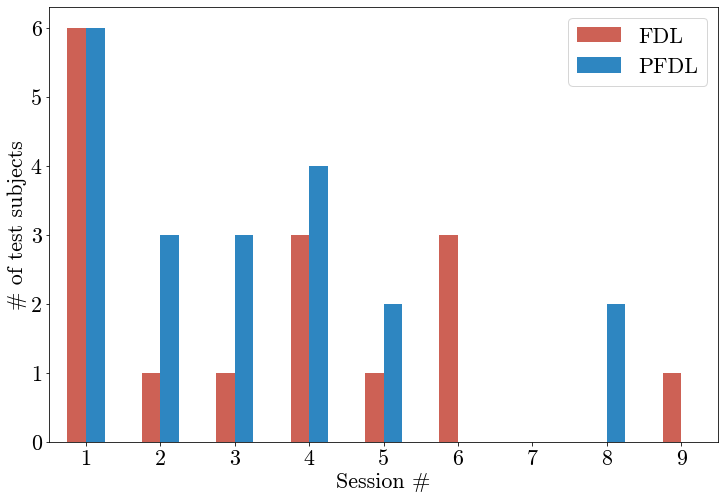

In [343]:
fig = plt.figure()
ax = table_final.T.reset_index().plot.bar(x='Session #', y=['FDL', 'PFDL'], figsize=(12,8), rot=0, color=['#CD6155', '#2E86C1'])
# ax = table_final_percentage.T.reset_index().plot.bar(x='Session #', y=['FDL', 'PFDL'], figsize=(12,8), rot=0, color=['#CD6155', '#2E86C1'])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(['FDL', 'PFDL'])
# ax.set_ylabel('% of test subjects')
ax.set_ylabel('# of test subjects')
plt.savefig('F1 Comparison absolute.pdf')